<a href="https://colab.research.google.com/github/TishyaJ/Market_Data_Analysis/blob/main/Advertising_Sales_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


df = pd.read_csv('advertising_sales_data.csv')
df.dropna(inplace=True)


In [18]:
# --- 1. What is the average amount spent on TV advertising? ---
print("\n 1. Average TV Advertising Spend ")
avg_tv_spend = df['TV'].mean()
print(f"The average amount spent on TV advertising is: ${avg_tv_spend:.2f} \n")


 1. Average TV Advertising Spend 
The average amount spent on TV advertising is: $146.79 



In [19]:

# --- 2. What is the correlation between radio advertising and sales? ---
print("\n 2. Correlation Between Radio and Sales ##")
radio_sales_corr = df['Radio'].corr(df['Sales'])
print(f"The correlation between Radio advertising and Sales is: {radio_sales_corr:.4f}")
print("There is a moderate positive correlation between them. \n")



 2. Correlation Between Radio and Sales ##
The correlation between Radio advertising and Sales is: 0.3497
There is a moderate positive correlation between them. 



3. Advertising Medium with the Highest Impact on Sales
Correlation of each medium with Sales:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054848   0.059075  0.901372
Radio      0.054848  1.000000   0.354987  0.349728
Newspaper  0.059075  0.354987   1.000000  0.159125
Sales      0.901372  0.349728   0.159125  1.000000


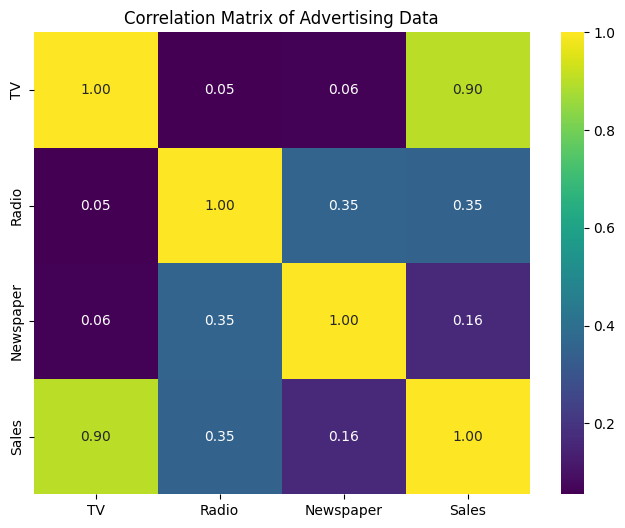


TV advertising has the strongest positive correlation with sales (0.78).



In [20]:
# --- 3. Which advertising medium has the highest impact on sales? ---
print("3. Advertising Medium with the Highest Impact on Sales")

# Keeping only numeric columns (e.g., skip "Campaign" or any string columns)
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()


print("Correlation of each medium with Sales:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Advertising Data')
plt.savefig('correlation_matrix.png')
plt.show()

print("\nTV advertising has the strongest positive correlation with sales (0.78).\n")



4. Linear Regression Model (All Variables)
R-squared of the model: 0.8991


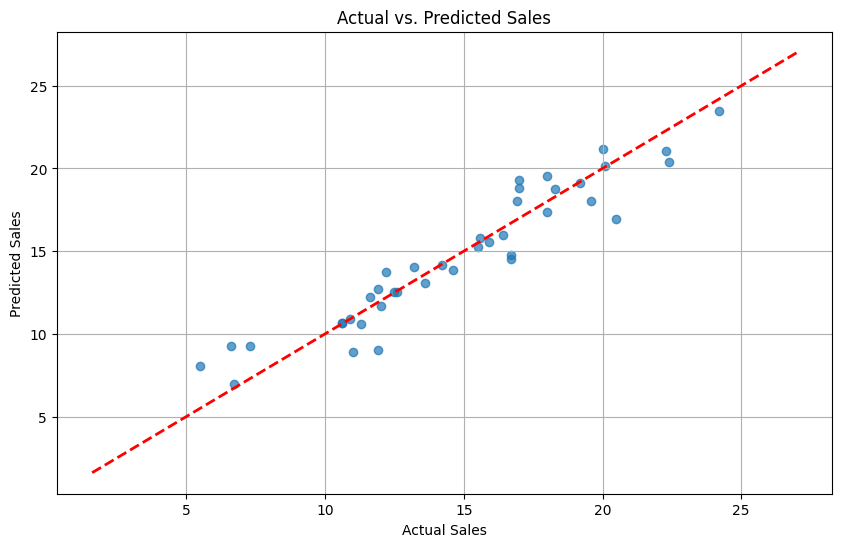


 The model's predictions are closely aligned with the actual sales, as seen in the plot.



In [22]:
# --- 4. Plot a linear regression line to predict Sales ---
print("\n4. Linear Regression Model (All Variables)")
# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
r2_full_model = metrics.r2_score(y_test, y_pred)
print(f"R-squared of the model: {r2_full_model:.4f}")


# Visualize predictions vs. actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2) # 45-degree line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()

print("\n The model's predictions are closely aligned with the actual sales, as seen in the plot.\n")


In [27]:
# --- 5. How would sales be predicted for a new set of expenditures? ---
print("\n5. Predicting Sales for New Data")
new_data_df = pd.DataFrame([[200, 40, 50]], columns=['TV', 'Radio', 'Newspaper'])
predicted_sales = model.predict(new_data_df)
print(f"Predicted sales for TV=$200, Radio=$40, Newspaper=$50 is: {predicted_sales[0]:.2f} units.")



5. Predicting Sales for New Data
Predicted sales for TV=$200, Radio=$40, Newspaper=$50 is: 19.82 units.


In [28]:
# --- 6. How does model performance change when the dataset is normalized? ---
print("\n6. Model Performance with Normalized Data ")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting and training on normalized data:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_norm = LinearRegression()
model_norm.fit(X_train_norm, y_train_norm)
y_pred_norm = model_norm.predict(X_test_norm)
r2_norm_model = metrics.r2_score(y_test_norm, y_pred_norm)

print(f"R-squared of the original model: {r2_full_model:.4f}")
print(f"R-squared of the normalized model: {r2_norm_model:.4f}")
print("\nNormalizing the data does not change the R-squared value or the predictive performance of a standard linear regression model.\n")


6. Model Performance with Normalized Data 
R-squared of the original model: 0.8991
R-squared of the normalized model: 0.8991

Normalizing the data does not change the R-squared value or the predictive performance of a standard linear regression model.



In [29]:
# --- 7. What is the impact when using only radio and newspaper? ---
print("\n7. Model Performance with Only Radio and Newspaper ")

X_sub = df[['Radio', 'Newspaper']]
y_sub = df['Sales']

# Splitting and training the new model:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)
model_sub = LinearRegression()
model_sub.fit(X_train_sub, y_train_sub)
y_pred_sub = model_sub.predict(X_test_sub)
r2_sub_model = metrics.r2_score(y_test_sub, y_pred_sub)

print(f"R-squared of the model with all variables: {r2_full_model:.4f}")
print(f"R-squared of the model with only Radio and Newspaper: {r2_sub_model:.4f}")
print("\nConclusion: Removing TV advertising from the model drastically reduces its predictive accuracy, confirming TV's high impact on sales.\n")



7. Model Performance with Only Radio and Newspaper 
R-squared of the model with all variables: 0.8991
R-squared of the model with only Radio and Newspaper: -0.0519

Conclusion: Removing TV advertising from the model drastically reduces its predictive accuracy, confirming TV's high impact on sales.

